In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

# Exploratory Data Analysis

Categorical and Numerical variables

In [3]:
numeric = train.select_dtypes(exclude="object")
categorical = train.select_dtypes(include="object")
print("# of Numeric Variables : ", len(numeric.columns))
print("# of Categorical Variables : ", len(categorical.columns))

# of Numeric Variables :  38
# of Categorical Variables :  43


Numeric Variables are :

In [4]:
print(list(numeric.columns))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Categorical variables are :

In [5]:
print(list(categorical.columns))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Analysing Sale Price

Let's take a quick look at Sale Price.

In [6]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Distribution of Sale Price')

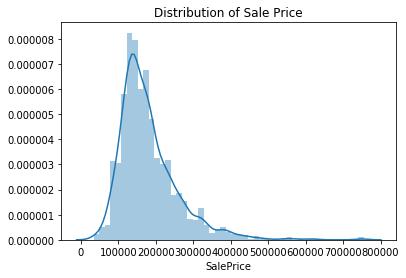

In [10]:
sns.distplot(train["SalePrice"]).set_title('Distribution of Sale Price')

Use the log transformation to get normal distribution

Text(0.5, 1.0, 'Distribution of Sale Price')

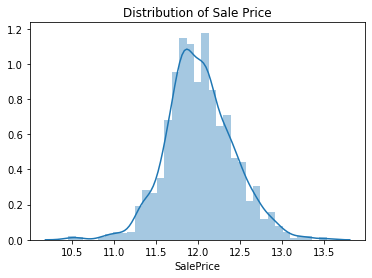

In [12]:
sns.distplot(np.log1p(train["SalePrice"])).set_title('Distribution of Sale Price')

Text(0.5, 1.0, 'Box plot of Sale Price')

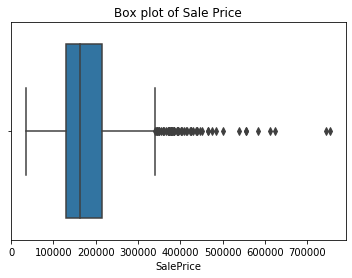

In [8]:
sns.boxplot(x = train["SalePrice"]).set_title("Box plot of Sale Price")

Looks like Sale Price is right skewed.But the minimum value is not zero and there is no missing value, So we can proceed with our data analysis.

## Correlation of  Numeric variables

In [9]:
corrmat = train.corr()
values = corrmat.iloc[:,-1:]
values = values.sort_values(by = ['SalePrice'],ascending = False)
values = values.iloc[1:16]
cm = sns.light_palette("blue", as_cmap=True)
s = values.style.background_gradient(cmap=cm)
s

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


Above table shows the top 15 highest correlated numerical variables.

#### Overall quality Vs Sale price

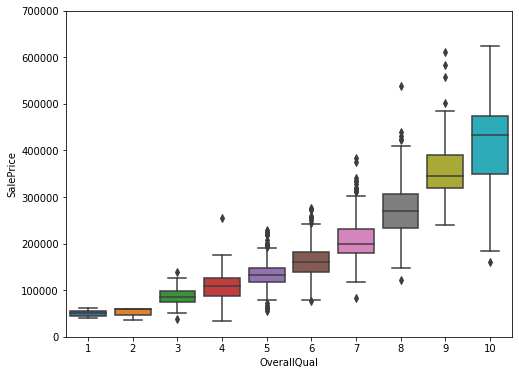

In [11]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[y_val]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=700000);

#### Ground living area Vs Sale price

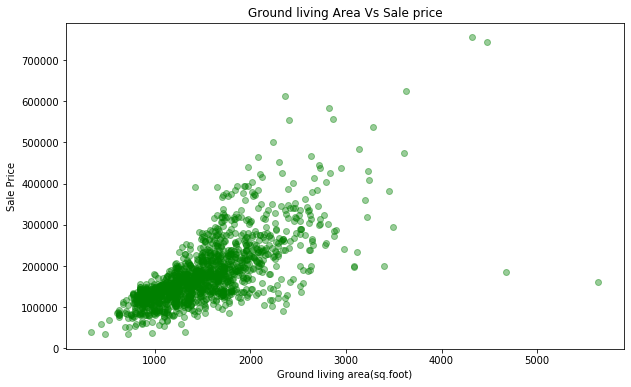

In [35]:
plt.figure(figsize=(10,6))
var = 'GrLivArea'
plt.scatter(x = train[var],y = train['SalePrice'],color='green',alpha = 0.4)
plt.title("Ground living Area Vs Sale price")
plt.xlabel('Ground living area(sq.foot)')
plt.ylabel('Sale Price')
plt.show()

There is a linear relationship between Sale Price and the Ground Living Area.

#### Garage cars Vs Sale price 

<Figure size 720x432 with 0 Axes>

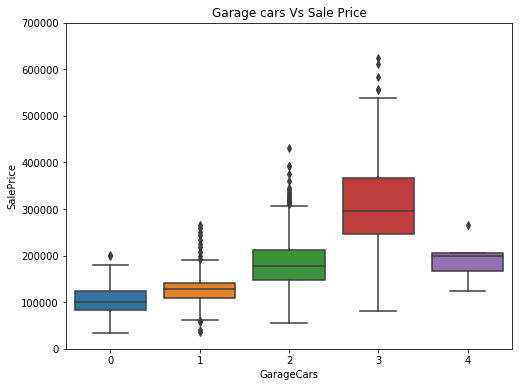

In [30]:
plt.figure(figsize=(10,6))
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6));
plt.title('Garage cars Vs Sale Price')
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=700000);

#### Total basement area Vs Sale price

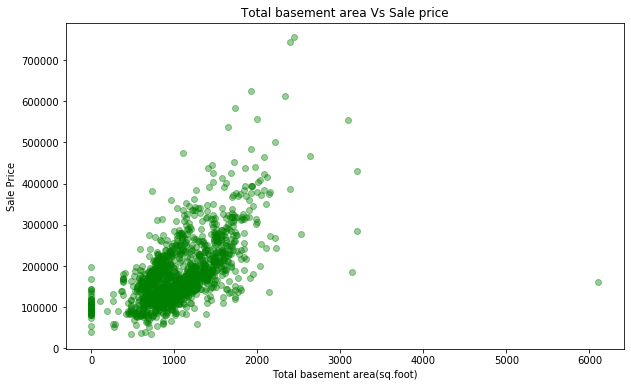

In [34]:
plt.figure(figsize=(10,6))
var = 'TotalBsmtSF'
plt.scatter(x = train[var],y = train['SalePrice'],color='green',alpha = 0.4)
plt.title("Total basement area Vs Sale price")
plt.xlabel('Total basement area(sq.foot)')
plt.ylabel('Sale Price')
plt.show()

Looks like there is a exponential relationship between Total basement area and Sale price.

## Categorical Variables

Let's look at some categoriacal variable which I think are important.Neighborhood, Building Type and House Style.

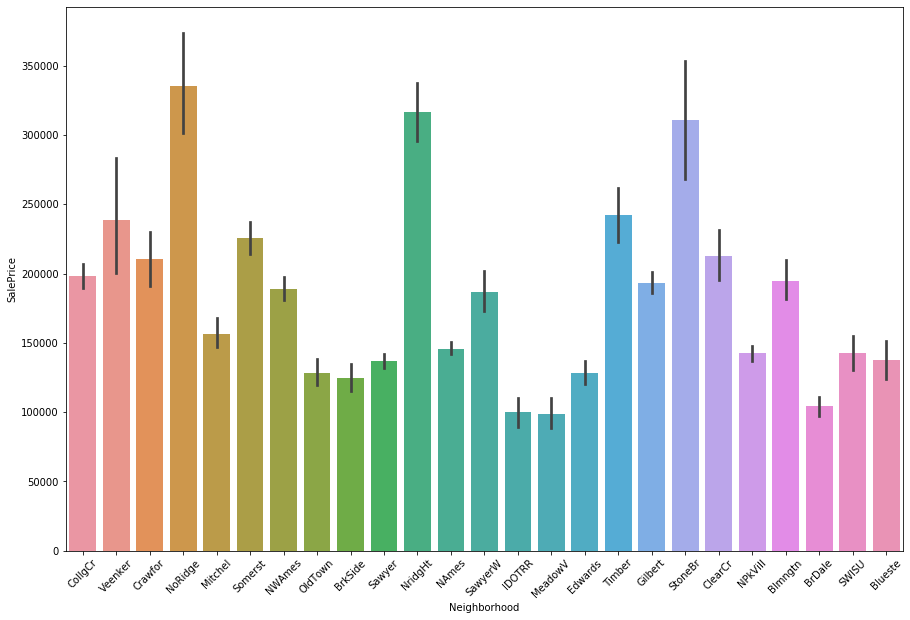

In [43]:
var  = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
ax = sns.barplot(x=var, y="SalePrice", data=data)

Above graph shows the avg. price of house in differnet neighborhood. Above graph indicates Sale price might have some dependency on neighborhood.

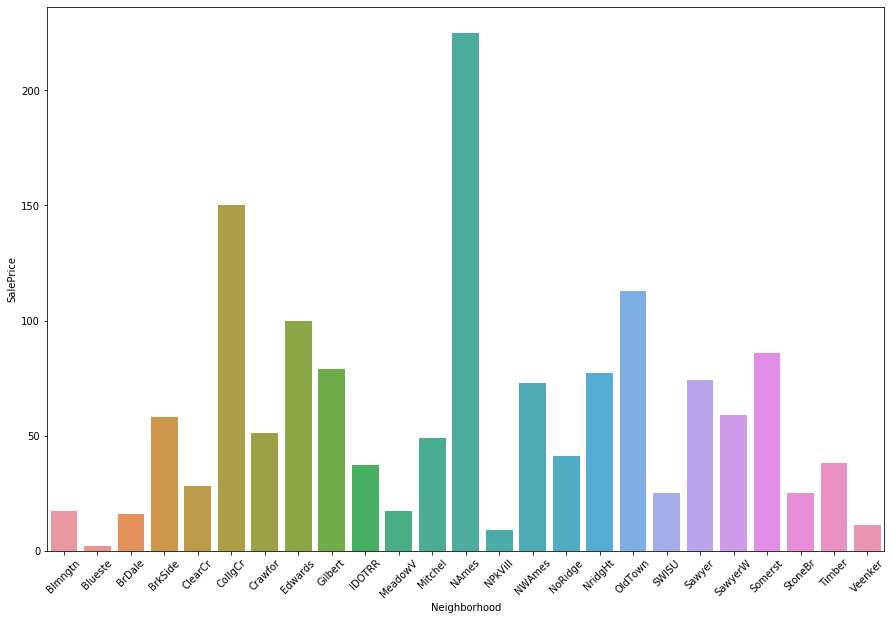

In [61]:
avg_price = train[['Neighborhood','SalePrice']]
res = avg_price.groupby(['Neighborhood']).count()
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
ax = sns.barplot(x=res.index, y="SalePrice", data=res)

Above graph shows the number of houses in different neighborhoods.

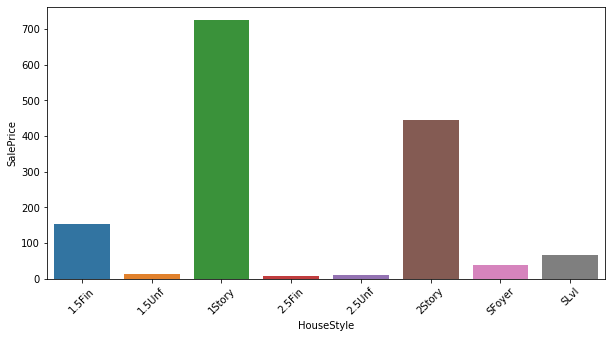

In [67]:
data = train[['HouseStyle','SalePrice']]
res = data.groupby(['HouseStyle']).count()
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
ax = sns.barplot(x=res.index, y="SalePrice", data=res)

Looks like most of the houses in the data belong to either 1Story or 2Story Building.

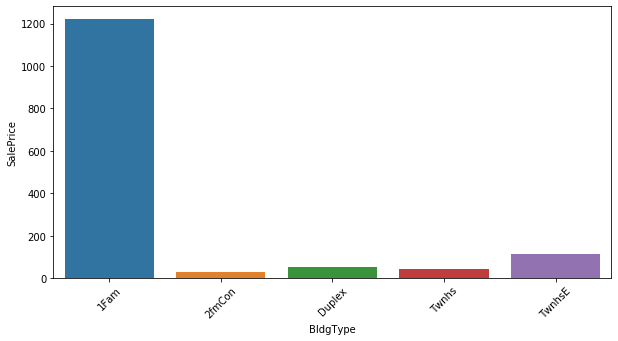

In [66]:
data = train[['BldgType','SalePrice']]
res = data.groupby(['BldgType']).count()
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
ax = sns.barplot(x=res.index, y="SalePrice", data=res)

Looks like most of the houses in the data are of type 1 Family. 